In [1]:
import requests
import spacy
import string 
import en_core_web_sm
import fr_core_news_sm
import wordcloud
import re

import matplotlib.pyplot as plt
import pandas as pd 

from bs4 import BeautifulSoup
from spacy import displacy
from spacy.lang.fr.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
nlp_en = en_core_web_sm.load()
nlp_fr = fr_core_news_sm.load()

In [3]:
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)

In [4]:
corpus = [i.strip() for i in corpus]

In [4]:
df = pd.DataFrame(corpus, columns=["documents"])

In [5]:
df['clean_documents'] = df['documents'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", " ") 
df['clean_documents'] = df['clean_documents'].fillna('').apply(lambda x: x.lower())

C:\Users\jerem\AppData\Local\Temp\ipykernel_2196\1101538210.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_documents'] = df['documents'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", " ")


In [6]:
document = " ".join(df['clean_documents'])

In [7]:
doc = nlp_fr(document)

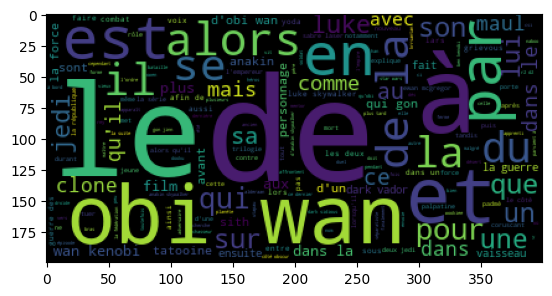

In [8]:
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)
plt.show()

In [9]:
liste = {"voilà", "différente", "ou", "tend", "c'", "dix-huit",  "me", "devant", "avons", "elle"}

In [10]:
stop_words = STOP_WORDS
stop_words.union(liste)


{'a',
 'abord',
 'afin',
 'ah',
 'ai',
 'aie',
 'ainsi',
 'ait',
 'allaient',
 'allons',
 'alors',
 'anterieur',
 'anterieure',
 'anterieures',
 'antérieur',
 'antérieure',
 'antérieures',
 'apres',
 'après',
 'as',
 'assez',
 'attendu',
 'au',
 'aupres',
 'auquel',
 'aura',
 'auraient',
 'aurait',
 'auront',
 'aussi',
 'autre',
 'autrement',
 'autres',
 'autrui',
 'aux',
 'auxquelles',
 'auxquels',
 'avaient',
 'avais',
 'avait',
 'avant',
 'avec',
 'avoir',
 'avons',
 'ayant',
 'bas',
 'basee',
 'bat',
 "c'",
 'car',
 'ce',
 'ceci',
 'cela',
 'celle',
 'celle-ci',
 'celle-la',
 'celle-là',
 'celles',
 'celles-ci',
 'celles-la',
 'celles-là',
 'celui',
 'celui-ci',
 'celui-la',
 'celui-là',
 'cent',
 'cependant',
 'certain',
 'certaine',
 'certaines',
 'certains',
 'certes',
 'ces',
 'cet',
 'cette',
 'ceux',
 'ceux-ci',
 'ceux-là',
 'chacun',
 'chacune',
 'chaque',
 'chez',
 'ci',
 'cinq',
 'cinquantaine',
 'cinquante',
 'cinquantième',
 'cinquième',
 'combien',
 'comme',
 'comment',

In [11]:
tokenized_doc = df['clean_documents'].fillna('').apply(lambda x: nlp_fr(x))
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in stop_words])
tokenized_doc

0     [\n\t\t\t\t, page, contributeur, déconnecter, ...
1     [\n\t\t\t\t, content, \n\t\t\t\t, move, to, si...
2     [article, homonyme,  , voir, obi, wan, kenobi,...
3                                                  [\n]
4     [obi, wan, kenobi,  , ben, kenobi,  , personna...
                            ...                        
78    [émission, téléviser, vouloir, gagner, million...
79    [municipalité, lubicz,  , non, loin, toruń,  ,...
80    [obi, wan, nom, bar, shanghaï, échappe, indian...
81                              [projet, wikimedia,   ]
82    [   , document, utiliser, source, rédaction, a...
Name: clean_documents, Length: 83, dtype: object

In [12]:
df["clean_token"] = [" ".join(x) for x in tokenized_doc]

In [14]:
new_doc = " ".join(df["clean_token"])

In [18]:
new_doc = nlp_fr(new_doc)

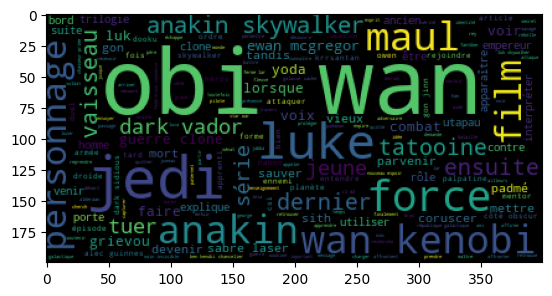

In [19]:
wd = wordcloud.WordCloud()
cloud = wd.generate(new_doc.text)
plt.imshow(cloud)
plt.show()

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_token'])

In [36]:
vectorizer.vocabulary_

{'page': 696,
 'contributeur': 255,
 'déconnecter': 331,
 'savoir': 896,
 'content': 253,
 'move': 644,
 'to': 993,
 'sidebar': 910,
 'hide': 476,
 'article': 113,
 'homonyme': 480,
 'voir': 1061,
 'obi': 665,
 'wan': 1071,
 'kenobi': 569,
 'homonymie': 481,
 'ben': 148,
 'personnage': 719,
 'fiction': 420,
 'univers': 1030,
 'série': 965,
 'cinématographique': 205,
 'star': 941,
 'wars': 1073,
 'créer': 279,
 'george': 452,
 'lucer': 597,
 'chevalier': 196,
 'maître': 615,
 'jedi': 553,
 'emblématique': 355,
 'saga': 884,
 'être': 1108,
 'jusque': 564,
 'sortie': 928,
 'rogue': 847,
 'one': 679,
 '2016': 15,
 'faire': 407,
 'apparition': 98,
 'film': 423,
 'présence': 775,
 'réel': 860,
 'forme': 440,
 'fantôme': 410,
 'simplement': 913,
 'caméo': 174,
 'entendre': 380,
 'voix': 1062,
 'padawan': 694,
 'gon': 455,
 'jinn': 558,
 'devenir': 295,
 'instructeur': 524,
 'anakin': 89,
 'skywalker': 920,
 'mort': 639,
 'issue': 541,
 'terrible': 987,
 'combat': 218,
 'dernier': 294,
 'chois